# First Deep Learning Model

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

In [3]:
X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

In [4]:
X

array([[ 0.24265541,  0.0383196 ],
       [ 0.04433036, -0.05667334],
       [-0.78677748, -0.75718576],
       ...,
       [ 0.0161236 , -0.00548034],
       [ 0.20624715,  0.09769677],
       [-0.19186631,  0.08916672]])

In [5]:
X.shape

(1000, 2)

Text(0.5, 1.0, 'Blue circles and Red crosses')

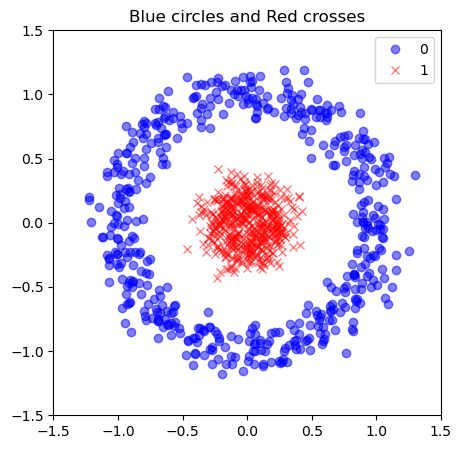

In [6]:
plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

2023-02-14 11:59:21.749977: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model = Sequential()

2023-02-14 11:59:29.776474: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.add(Dense(4, input_shape=(2,), activation='tanh'))

In [10]:
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 640us/step - loss: 0.6645 - accuracy: 0.6880
Epoch 2/20
32/32 [==============================] - 0s 760us/step - loss: 0.5694 - accuracy: 0.8070
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.8540
Epoch 4/20
32/32 [==============================] - 0s 830us/step - loss: 0.3891 - accuracy: 0.8680
Epoch 5/20
32/32 [==============================] - 0s 842us/step - loss: 0.3128 - accuracy: 0.9000
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9700
Epoch 7/20
32/32 [==============================] - 0s 942us/step - loss: 0.1779 - accuracy: 0.9970
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1376 - accuracy: 0.9980
Epoch 9/20
32/32 [==============================] - 0s 808us/step - loss: 0.1098 - accuracy: 0.9980
Epoch 10/20
32/32 [==============================] - 0s 693us/step - loss: 0.0893 - accuracy: 0.9990
Epoch

In [13]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

319/319 [==============================] - 0s 405us/step


Text(0.5, 1.0, 'Blue circles and Red crosses')

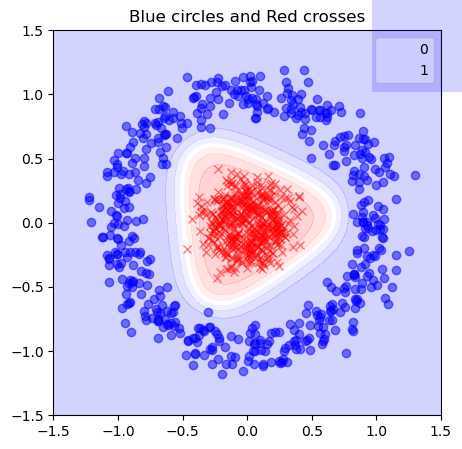

In [14]:
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")